## Title

In [2]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
fname = '../../paper-drone2report/data/example_RGB/ROI_id=1.png'
pic = imageio.imread(fname)

In [5]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

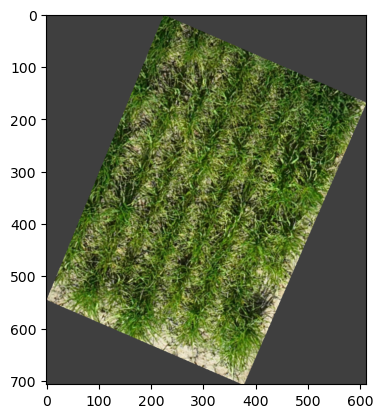

In [6]:
 plt.imshow(pic)

In [7]:
print('Type of the image : ' , type(pic))
print()
print('Shape of the image : {}'.format(pic.shape))
print('Image Hight {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'numpy.ndarray'>

Shape of the image : (707, 612, 3)
Image Hight 707
Image Width 612
Dimension of Image 3


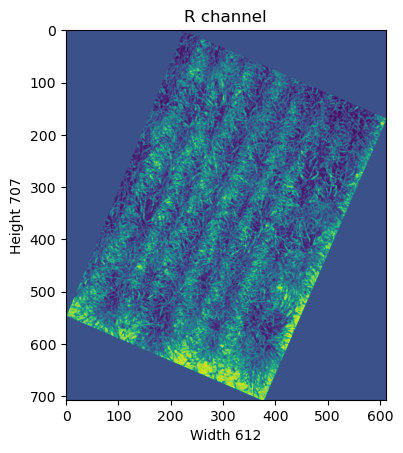

In [8]:
plt.title('R channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 0])

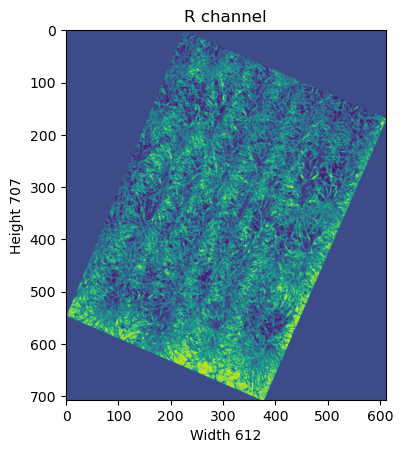

In [9]:
plt.title('R channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 1])
#plt.show()

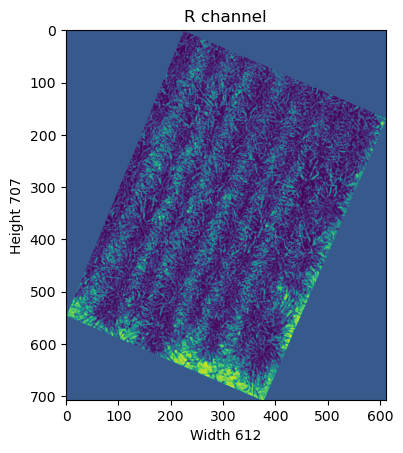

In [10]:
plt.title('R channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 2])
plt.show()

In [11]:
pic[ : , : , 2]

array([[63, 63, 63, ..., 63, 63, 63],
       [63, 63, 63, ..., 63, 63, 63],
       [63, 63, 63, ..., 63, 63, 63],
       ...,
       [63, 63, 63, ..., 63, 63, 63],
       [63, 63, 63, ..., 63, 63, 63],
       [63, 63, 63, ..., 63, 63, 63]], dtype=uint8)

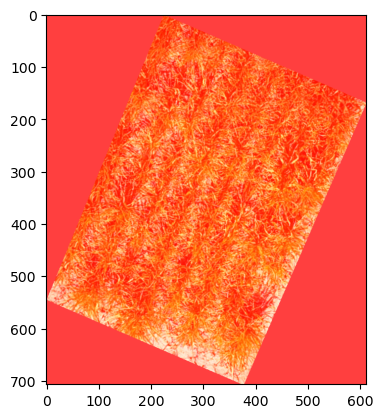

In [12]:
pic = imageio.imread(fname)

pic[0:720 , : , 0] = 255 # full intensity to those pixel's R channel
plt.figure()
plt.imshow(pic)
plt.show()


In [26]:
import numpy as np
import numpy.ma as ma

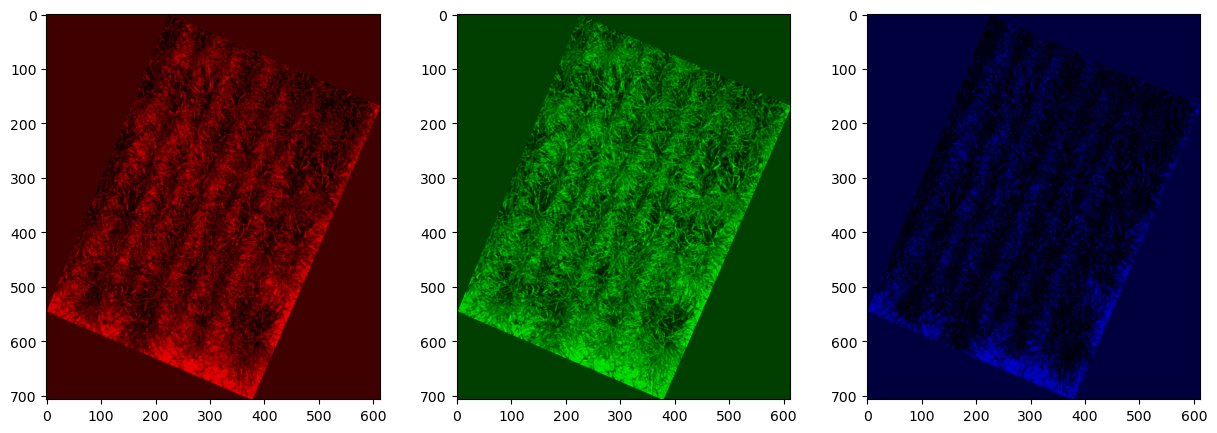

In [14]:
pic = imageio.imread(fname)

fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = pic[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)

In [25]:
pic[0:10, 0:10, 0]

array([[63, 63, 63, 63, 63, 63, 63, 63, 63, 63],
       [63, 63, 63, 63, 63, 63, 63, 63, 63, 63],
       [63, 63, 63, 63, 63, 63, 63, 63, 63, 63],
       [63, 63, 63, 63, 63, 63, 63, 63, 63, 63],
       [63, 63, 63, 63, 63, 63, 63, 63, 63, 63],
       [63, 63, 63, 63, 63, 63, 63, 63, 63, 63],
       [63, 63, 63, 63, 63, 63, 63, 63, 63, 63],
       [63, 63, 63, 63, 63, 63, 63, 63, 63, 63],
       [63, 63, 63, 63, 63, 63, 63, 63, 63, 63],
       [63, 63, 63, 63, 63, 63, 63, 63, 63, 63]], dtype=uint8)

In [16]:
def GLI(img, channels):
	"""Green leaf index, uses red, green, blue"""
	try:
		red   = img[:,:,channels.index('red')]
		green = img[:,:,channels.index('green')]
		blue  = img[:,:,channels.index('blue')]
	except ValueError:
		#if this clause is activated it means that the requested channel(s) are not available
		return np.nan
	#if we get here the index can be applied to the current image
	return(
		(2.0*green - red - blue) / 
		(2.0*green + red + blue)
	) 

In [17]:
channels = ['red','green','blue']
channels.index('red')

0

In [18]:
red   = pic[:,:,channels.index('red')]
green = pic[:,:,channels.index('green')]
blue  = pic[:,:,channels.index('blue')]

In [19]:
red

array([[63, 63, 63, ..., 63, 63, 63],
       [63, 63, 63, ..., 63, 63, 63],
       [63, 63, 63, ..., 63, 63, 63],
       ...,
       [63, 63, 63, ..., 63, 63, 63],
       [63, 63, 63, ..., 63, 63, 63],
       [63, 63, 63, ..., 63, 63, 63]], dtype=uint8)

In [20]:
(2.0*green - red - blue) / (2.0*green + red + blue)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
gli_values = GLI(pic, channels)
gli_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
gli_values[120:180,220:280]

array([[0.07332293, 0.08108108, 0.05128205, ..., 0.23174603, 0.09157509,
        0.11949686],
       [0.10882957, 0.08421053, 0.12781955, ..., 0.18787879, 0.11743772,
        0.1121643 ],
       [0.14814815, 0.15555556, 0.16129032, ..., 0.27038627, 0.15533981,
        0.13333333],
       ...,
       [0.38947368, 0.38562092, 0.375     , ..., 0.12707182, 0.12463768,
        0.17647059],
       [0.38582677, 0.37579618, 0.33928571, ..., 0.20123839, 0.15753425,
        0.19626168],
       [0.27699531, 0.34161491, 0.38860104, ..., 0.38235294, 0.27536232,
        0.22344322]])